In [1]:
#------------------------ Importando as Bibliotecas --------------------------
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt



In [2]:
#------------------------ Files --------------------------
eletricity_generation = pd.read_excel('electricity_generation_total.xlsx')
energy_hydro = pd.read_excel('EnergyHydro.xls', sheet_name="Data", skiprows=3)
energy_oil = pd.read_excel("EnergyProductionOilSources.xls", sheet_name="Data", skiprows=3)
gdp = pd.read_excel("GDP_WorldBank.xls", sheet_name="Data", skiprows=3)
attendend_92 = pd.read_excel("PaisesParticipantes.xls")
green_energy = pd.read_excel("EnergyGreen.xls", sheet_name="Data", skiprows=3)
fossil_energy_consumption = pd.read_excel("fossilenergy.xls", sheet_name="Data", skiprows=3)

In [3]:
#---------------------------- Mudando o Indice -----------------------------
country_idx = attendend_92.set_index('Paises participantes')
energyhydro_idx = energy_hydro.set_index('Country Name')
energyoil_idx = energy_oil.set_index("Country Name")
greenenergy_idx = green_energy.set_index("Country Name")
fossil_consumption_idx = fossil_energy_consumption.set_index('Country Name')
gdp_idx = gdp.set_index('Country Name')
eletricity_generation_idx = eletricity_generation.set_index("country")

In [39]:
# ----------------------------- Filtração 1--------------------------- 
Energy_Hydro = energyhydro_idx[energyhydro_idx.columns[35:58]]
Energy_Oil = energyoil_idx[energyoil_idx.columns[35:58]]
Energy_Green = greenenergy_idx[greenenergy_idx.columns[35:58]
Fossil_1 = fossil_consumption_idx[fossil_consumption_idx.columns[35:58]]
GDP = gdp_idx[gdp_idx.columns[35:58]]
Eletricity_Generation = eletricity_generation_idx[eletricity_generation_idx.columns[7:30]]

In [40]:
Eletricity_Generation.head(3)

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Algeria,18300000000,19400000000,19900000000,19700000000,20700000000,21500000000,23300000000,24800000000,25400000000,26600000000,...,33900000000,35200000000,37300000000,40200000000,43100000000,45700000000,53100000000,57400000000,59900000000,64200000000
Argentina,56500000000,61600000000,65500000000,68800000000,72900000000,77600000000,80300000000,86200000000,94400000000,95200000000,...,111000000000,113000000000,115000000000,129000000000,130000000000,133000000000,129000000000,136000000000,140000000000,142000000000
Australia,161000000000,165000000000,170000000000,175000000000,180000000000,189000000000,199000000000,207000000000,217000000000,224000000000,...,231000000000,238000000000,243000000000,245000000000,250000000000,251000000000,256000000000,251000000000,250000000000,247000000000


In [41]:
#Energy_Hydro.head(3)

In [42]:
#Energy_Oil.head(3)

In [43]:
#Energy_Green.head(3)

In [44]:
#Fossil_1.head(3)

In [45]:
#GDP.head(3)

In [46]:
#------------------------------------ Filtração 2 ------------------------------------------
EnergyOil = energyoil_idx.loc[:,[1992, "2014"]]
EnergyGreen = greenenergy_idx.loc[:,[2000, "2014"]]
EnergyHydro = energyhydro_idx.loc[:,[1992, "2014"]]
Fossil2 = fossil_consumption_idx.loc[:,[1992, "2014"]]
GDP2 = gdp_idx.loc[:,[1992, "2014"]]
Eletricity_Generation1 = eletricity_generation_idx.loc[:,[1992,"2014"]]



In [47]:
list(EnergyGreen)

[2000, '2014']

In [48]:
#Eletricity_Generation.head(2)

In [49]:
#EnergyOil.head(3)

In [50]:
EnergyGreen.head(3)

,2000,2014
Country Name,,
Aruba,NaN,NaN
Afghanistan,NaN,NaN
Angola,NaN,0.0


In [51]:
EnergyHydro.head(3)

,1992,2014
Country Name,,
Aruba,NaN,NaN
Afghanistan,NaN,NaN
Angola,NaN,53.175105


In [52]:
#Fossil2.head(3)

In [53]:
#GDP2.head(3)

In [54]:
# ------------------------------ Junção dos dados ------------------------------ 
Energy_Oil_Join = country_idx.join(Energy_Oil, how='inner', lsuffix='_Country', rsuffix='_Energy')
Energy_Hydro_Join = country_idx.join(Energy_Hydro, how='inner', lsuffix='_Country', rsuffix='_EHydro')
Energy_Green_Join = country_idx.join(Energy_Green, how='inner', lsuffix='_Country', rsuffix='_EGreen')
Fossil_Join =  country_idx.join(Fossil_1, how='inner', lsuffix='_Country', rsuffix='_FossionC')
GDP3 = country_idx.join(GDP, how='inner', lsuffix='_Country', rsuffix='_GDP')
#Energy_Oil_Right = Energy_Oil.join(country_idx, how="outer", lsuffix='_Country', rsuffix='_EnergyOil')
Eletricity_Generation2 = country_idx.join(Eletricity_Generation,  how='inner', lsuffix='_Country', rsuffix='_Energy')

In [55]:
#Energy_Oil_Right.head(10)

In [56]:
#Energy_Oil_Join.head(10)

In [57]:
#Energy_Hydro_Join.head(3)

In [58]:
#Energy_Green_Join.head(3)

In [59]:
#Fossil_Join.head(3)

In [60]:
#GDP3.head(3)

In [61]:
#Eletricity_Generation2.head(3)

In [62]:
#------------------------ plotar ------------
y = Eletricity_Generation2
x = y.index

In [63]:
e = y.dropna()

In [64]:
clean_energy = Energy_Green_Join.dropna()

In [65]:
energia_total =e.T
energia_total.head()

,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Denmark,Ecuador,...,Poland,Portugal,Qatar,Romania,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vietnam
1992,18300000000,56500000000,161000000000,51200000000,19700000000,8890000000,37600000000,72200000000,30700000000,7200000000,...,133000000000,30100000000,5180000000,54200000000,67300000000,253000000000,18700000000,321000000000,3280000000000,9710000000
1993,19400000000,61600000000,165000000000,52700000000,19100000000,9210000000,33400000000,70800000000,34000000000,7410000000,...,134000000000,31200000000,5560000000,55500000000,73800000000,230000000000,21700000000,323000000000,3400000000000,10700000000
1994,19900000000,65500000000,170000000000,53300000000,17600000000,9780000000,31400000000,72200000000,40200000000,8140000000,...,135000000000,31400000000,5850000000,55100000000,78300000000,203000000000,23700000000,327000000000,3460000000000,12300000000
1995,19700000000,68800000000,175000000000,56600000000,17000000000,10800000000,24900000000,74400000000,36700000000,8430000000,...,139000000000,33300000000,6010000000,59300000000,86200000000,194000000000,25000000000,337000000000,3570000000000,14700000000
1996,20700000000,72900000000,180000000000,54800000000,17100000000,11500000000,23700000000,76100000000,53600000000,9680000000,...,143000000000,34500000000,6620000000,61400000000,94900000000,182000000000,26600000000,351000000000,3660000000000,17000000000


In [66]:
energia_verde_t = Energy_Green_Join.T
energia_verde_t.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,United States,Uruguay,Vanuatu,Vietnam,Zimbabwe
1992,NaN,0.0,0.0,0.0,NaN,102000000.0,0.0,670000000.0,1.306000e+09,0.0,...,NaN,0.0,0.0,9.740000e+08,0.0,6.994500e+10,66000000.0,NaN,0.0,0.0
1993,NaN,0.0,0.0,0.0,NaN,107000000.0,0.0,681000000.0,1.343000e+09,0.0,...,NaN,0.0,0.0,1.416000e+09,0.0,7.227800e+10,59000000.0,NaN,0.0,0.0
1994,NaN,0.0,0.0,0.0,NaN,120000000.0,0.0,687000000.0,1.188000e+09,0.0,...,NaN,0.0,0.0,1.861000e+09,0.0,7.369000e+10,59000000.0,NaN,0.0,0.0
1995,NaN,0.0,0.0,0.0,NaN,117000000.0,0.0,746000000.0,1.837000e+09,0.0,...,NaN,0.0,0.0,2.033000e+09,0.0,7.022700e+10,44000000.0,NaN,0.0,0.0
1996,NaN,0.0,0.0,0.0,NaN,363000000.0,0.0,954000000.0,1.574000e+09,0.0,...,NaN,0.0,0.0,2.292000e+09,0.0,7.194300e+10,41000000.0,NaN,0.0,0.0


In [67]:
energia_total_media = Eletricity_Generation2.mean()
energia_verde_media = Energy_Green_Join.mean()


No handles with labels found to put in legend.


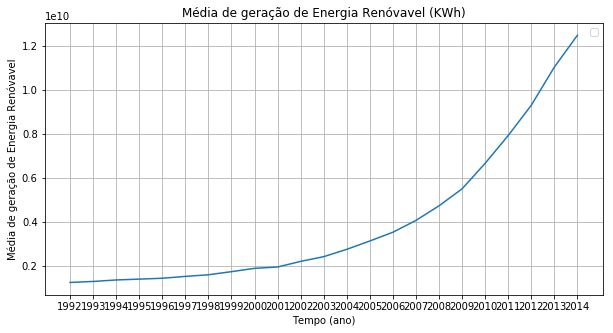

In [152]:
plt.plot(energia_verde_media,)
plt.title("Média de geração de Energia Renóvavel (KWh)")
plt.xlabel("Tempo (ano)")
plt.ylabel("Média de geração de Energia Renóvavel")
plt.legend()
plt.grid(True)
plt.show()
# plt.rcParams["figure.figsize"] = [10,5]
# plt.rcParams["axes.titlesize"] = 10
# plt.rcParams["xtick.labelsize"] = 8
# plt.rcParams["ytick.labelsize"] = 10
# plt.rcParams["axes.labelsize"] = 10
# plt.rcParams["lines.markersize"] = 15

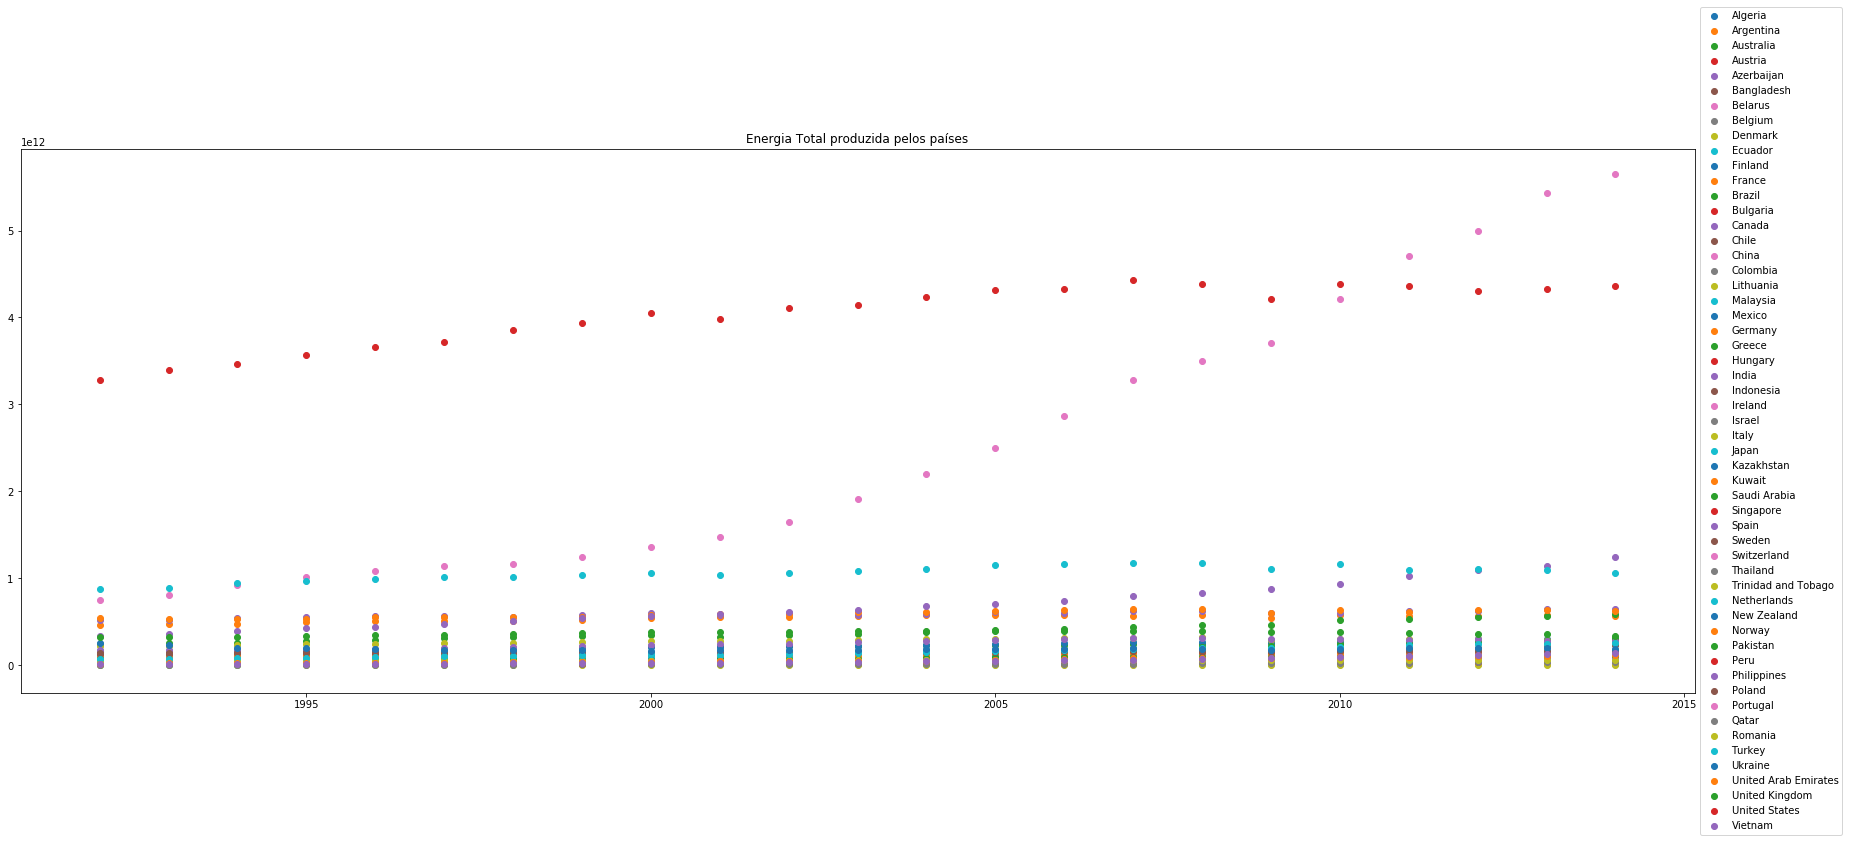

In [69]:
plt.figure(figsize=(30,10))

for pais in energia_total.columns:
    plt.scatter(x=energia_total.index, y=energia_total[pais])
plt.title("Energia Total produzida pelos países")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
#plt.plot(energia_total_media.index,  energia_total_media, color="r")
#plt.plot(energia_verde_media.index, energy_green_media, color="c")


In [70]:
    #energia_anos = energia
energia_verde = Energy_Green_Join.T
#enesrgia_verde

In [142]:
Energy_Green.mean()

1992    5.596356e+09
1993    5.798233e+09
1994    6.130489e+09
1995    6.452702e+09
1996    6.621768e+09
1997    7.075459e+09
1998    7.480055e+09
1999    8.181260e+09
2000    8.963549e+09
2001    9.385647e+09
2002    1.054821e+10
2003    1.165348e+10
2004    1.329510e+10
2005    1.508230e+10
2006    1.707930e+10
2007    1.983244e+10
2008    2.319889e+10
2009    2.728909e+10
2010    3.321657e+10
2011    3.988099e+10
2012    4.694475e+10
2013    5.627982e+10
2014    6.411755e+10
dtype: float64

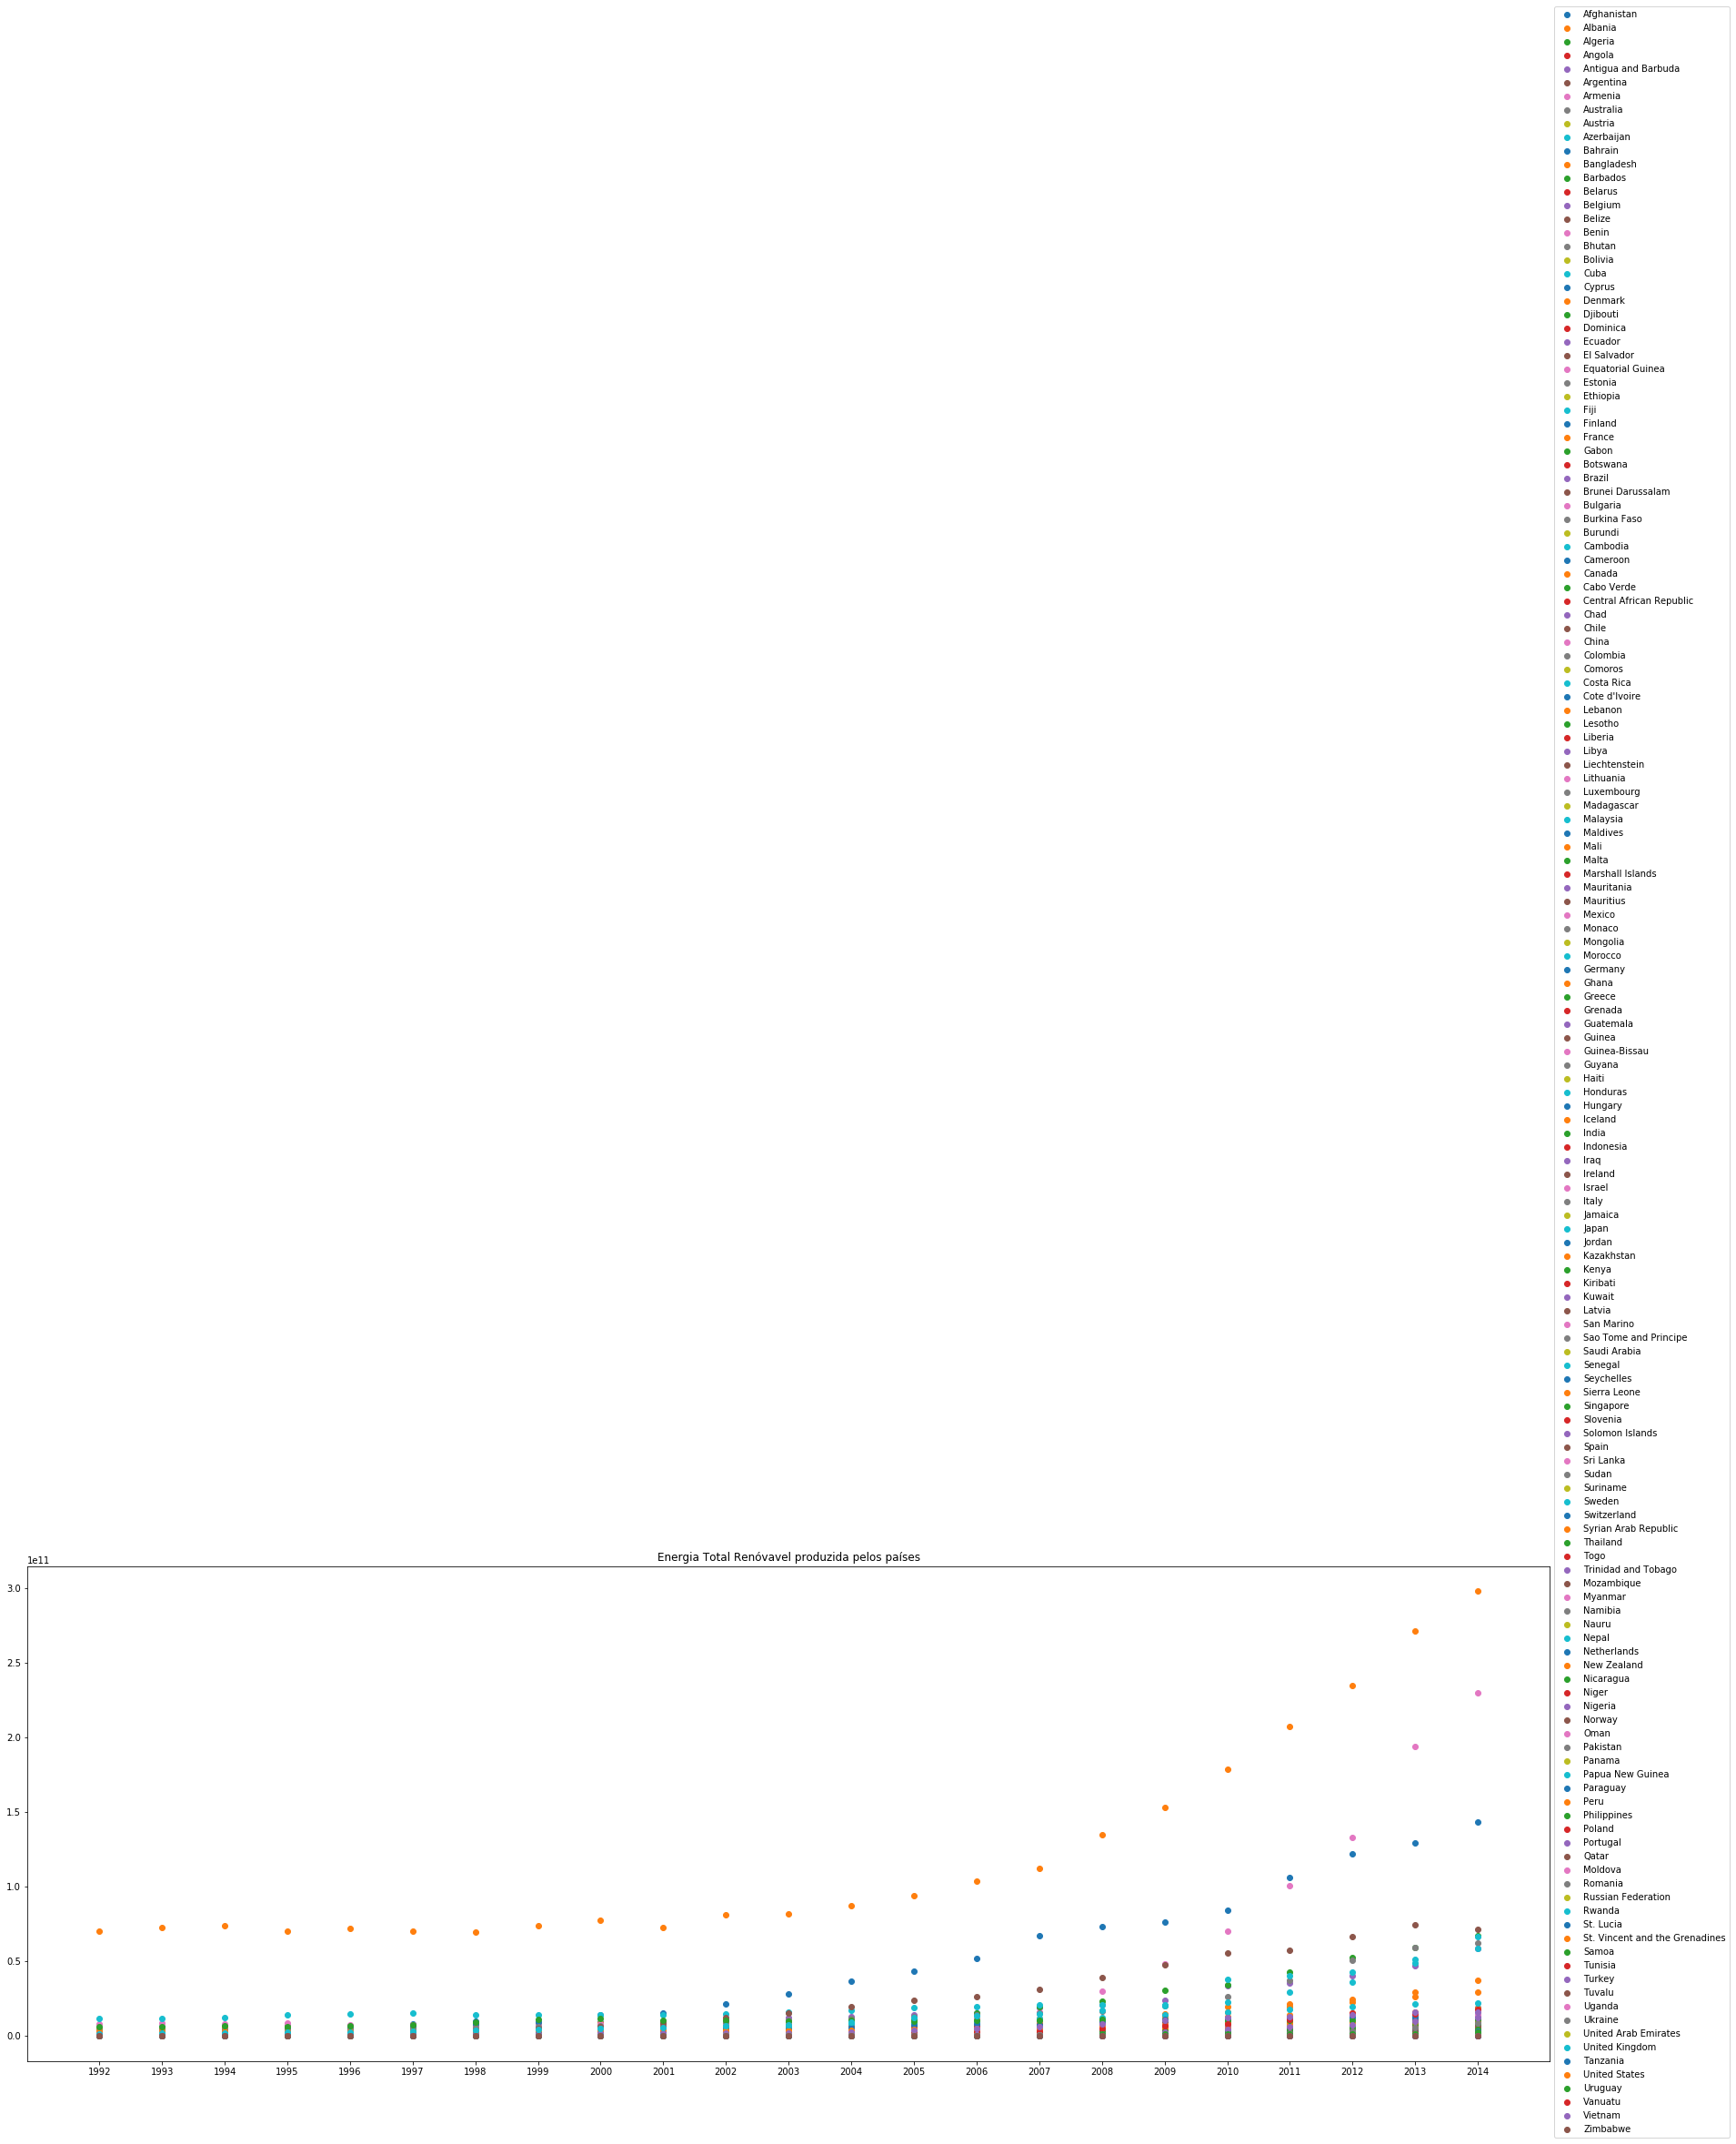

In [71]:
plt.figure(figsize=(30,10))
for pais in energia_verde.columns:
    plt.scatter(x=energia_verde.index, y=energia_verde[pais])
    plt.legend(loc="center left", bbox_to_anchor=(1,2))
    plt.title("Energia Total Renóvavel produzida pelos países")
    

In [72]:
# --------------------------------- ANALISE por região -----------------------------
# europa = ["Andorra",'Austria','Belgium','Bulgaria','Bosnia and Herzegovina','Channel Islands','Cyprus','Czech Republic','Germany',
#           'Denmark','Spain',  'Estonia', 'Finland','France','Faroe Islands','United Kingdom','Gibraltar','Greece','Croatia','Hungary',
#           'Isle of Man', 'Ireland',  'Iceland','Italy','Liechtenstein','Lithuania','Latvia','Monaco','Moldova','North Macedonia', 
#           'Malta','Montenegro', 'Netherlands','Poland','Portugal','Romania','Slovak Republic','Slovenia','Sweden','Turkey','Kosovo']
# america_north_central =["United States","Mexico","Canada","Guatemala","Cuba","Honduras","Nicaragua","El Salvador",
#                         "Costa Rica","Panama","Jamaica","Trinidad And Tobago","Belize","Barbados","Saint Lucia","Grenada","Saint Vincent And The Grenadines",
#                         "Antigua And Barbuda","Saint Kitts And Nevis"]
# america_south = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay",
#                  "Peru","Suriname","Uruguay","Venezuela"]
# asia =["China","Indonesia","Pakistan","Bangladesh","Japan","Philippines","Vietnam","Turkey","Iran","Thailand",
#        "Myanmar","South Korea","Iraq","Afghanistan","Saudi Arabia","Azerbaijan","Uzbekistan","Malaysia",
#        "Yemen","Nepal","North Korea","Sri Lanka","Kazakhstan","Syria","Cambodia","Jordan","United Arab Emirates",
#        "Tajikistan","Israel","Laos","Lebanon","Kyrgyzstan","Turkmenistan","Singapora","State of Palestine","Oman","Kuwait","Georgia","Mongolia","Armenia",
#        "Qatar","Bahrain","Cyprus","Maldives","Brunei"]
# africa =["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cameroon",
#          "Cape Verde","Central African Republic","Chad","Comoros","Congo","Djibouti","Egypt","Equatorial Guinea","Eritrea","Ethiopia","Gabon",
#          "Gambia","Ghana","Guinea","Guinea-Bissau","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi","Mali","Mauritania",
#          "Mauritius","Morocco","Mozambique","Namibia","Niger","Nigeria","Rwanda","São Tomé and Príncipe","Senegal",
#          "Seychelles","Sierra Leone","Somalia","South Africa","Sudan","South Sudan","Swaziland",
#          "Tanzania","Togo","Tunisia","Uganda","Zambia","Zimbabwe"]

paises_participantes = ["Afghanistan","Albania","Algeria","Angola","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Cuba",
                        "Cyprus","Korea, Rep.","Denmark","Djibouti","Dominica","Ecuador","Egypt, Arab Rep.","El Salvador","Equatorial Guinea","Estonia","Ethiopia","Fiji",
                        "Finland","France","Gabon","Botswana","Brazil","Brunei Darussalam","Bulgaria","Burkina Faso",
                        "Burundi","Cambodia","Cameroon","Canada","Cabo Verde","Central African Republic","Chad","Chile","China","Colombia","Comoros","Costa Rica","Cote d'Ivoire","Lebanon","Lesotho","Liberia","Libya","Liechtenstein",
                        "Lithuania","Luxembourg","Madagascar","Malaysia","Maldives","Mali","Malta","Marshall Islands",
                        "Mauritania","Mauritius","Mexico","Monaco","Mongolia","Morocco","Gambia, The","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary","Iceland","India",
                        "Indonesia","Iran, Islamic Rep.","Iraq","Ireland",
                        "Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","Kuwait",
                        "Latvia","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Seychelles","Sierra Leone","Singapore","Slovenia","Solomon Islands","Spain","Sri Lanka","Sudan","Suriname","Sweden","Switzerland","Syrian Arab Republic",
                        "Thailand","Togo","Trinidad and Tobago","Mozambique","Myanmar","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal",
                        "Qatar","Moldova","Romania","Russian Federation","Rwanda","St. Lucia","St. Vincent and the Grenadines","Samoa","Tunisia","Turkey","Tuvalu","Uganda","Ukraine","United Arab Emirates",
                        "United Kingdom","Tanzania","United States",
                        "Uruguay","Vanuatu","Venezuela, RB","Vietnam","Yemen, Rep.","Zimbabwe","Congo, Dem. Rep.","Congo, Rep."]

In [84]:
Energy_Green.loc[:,"Paises"] = "não"
GDP2.loc[:,"Paises"] = "não"
#Energy_Green["Paises"]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [89]:
Energy_Green.loc[paises_participantes, "Paises"] = "sim"
GDP2.loc[paises_participantes,"Paises"] = "sim"
#Energy_Green["Paises"]

In [90]:
Energy_Green.Paises.value_counts()

sim    164
não    100
Name: Paises, dtype: int64

In [91]:
GDP2.Paises.value_counts()

sim    164
não    100
Name: Paises, dtype: int64

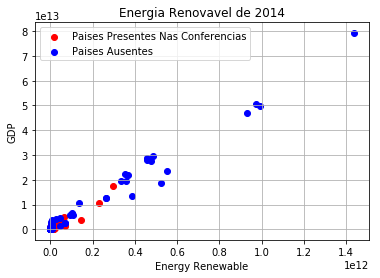

In [139]:
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim","2014"], GDP2.loc[GDP2.Paises=="sim", "2014"], color="r", label="Paises Presentes Nas Conferencias")
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não","2014"], GDP2.loc[GDP2.Paises=="não", "2014"], color="b", label="Paises Ausentes")
plt.title("Energia Renovavel de 2014")
plt.xlabel("Energy Renewable")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.show()

In [147]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    print("Taxa de correlaçâo:", '%06.4f' % (dados_x.corr(dados_y)))

    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Energia Renovavel X GDP')
    plt.xlabel('Energia Renovavel')
    plt.ylabel('GDP')
    
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


In [148]:
#list(Energy_Green)

Ajuste linear entre X3 e X4:
Coeficiente linear: -1908137707971.6514
Coeficiente angular: 53.49372515464276
Taxa de correlaçâo: 0.9895


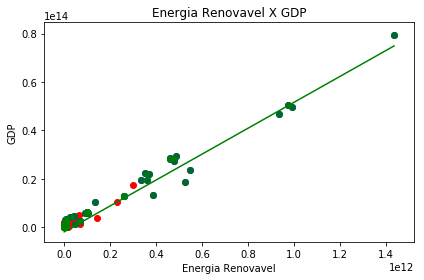

In [149]:
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim","2014"], GDP2.loc[GDP2.Paises=="sim", "2014"], color="r")
# reta(Energy_Green.loc[Energy_Green.Paises=="sim",'1992'], GDP2.loc[GDP2.Paises=="sim", '1992'], "r")
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não","2014"], GDP2.loc[GDP2.Paises=="não", "2014"], color="b")
reta(Energy_Green.loc[Energy_Green.Paises=="não",'2014'], GDP2.loc[GDP2.Paises=="não", '2014'], "g")


In [118]:
#nao funciona por algum motivo 
#plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não",1992], GDP2.loc[GDP2.Paises=="não",1992], color="b")
#plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim",1992], GDP2.loc[GDP2.Paises=="sim",1992], color="r")


In [119]:
#Energy_Green.index

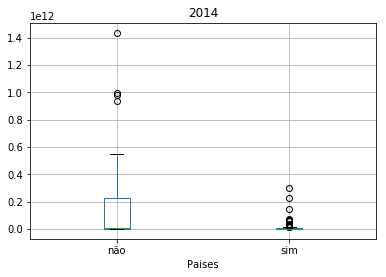

In [120]:
Energy_Green.boxplot(column="2014", by="Paises")
plt.suptitle("")
plt.show();


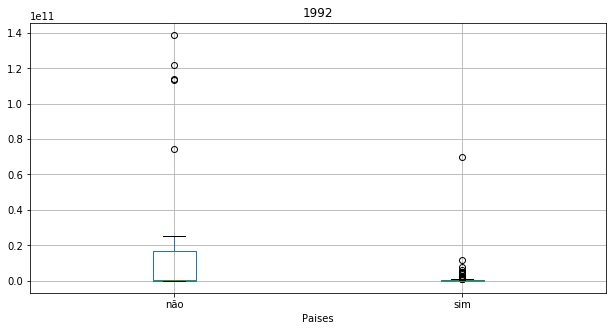

In [154]:
Energy_Green.boxplot(column="1992", by="Paises")
plt.suptitle("")
plt.show();


In [156]:
# dados = EnergyGreen + Fossil2 + GDP2 + Eletricity_Generation1
# dados

In [123]:
# plt.figure(figsize=(30,10))
# media_attendend = Energy_Green_Join.mean()
# while i<len(europa):
#     if attenend_92[i]==
#         plt.scatter(x=energia_verde.index, y=energia_verde[country])
#         plt.legend(loc="left center", bbox_to_anchor=(1,2))
#         plt.title("Energia Renovável produzida pelos países participantes")
#     else: 
#         plt.scatter(x=energia_verde.index, y=energia_verde[country])
#         plt.legend(loc="left center", bbox_to_anchor=(1,2))
#         plt.title("Energia Renovável de países, não participantes das conferências")
#     i+=1
# plt.plot()

In [188]:
Energy_Green_Co = greenenergy_idx[greenenergy_idx.columns[35:58]]
Co_2Evitado = []
for i in Energy_Green_Co:
    a = Energy_Green_Co[i].mean()
    evita = (a*305000)/(10**3)
    Co_2Evitado.append(evita)
print(Co_2Evitado)

[1706888444444.4446, 1768461166666.6665, 1869799111111.1113, 1968074005524.862, 2019639226519.337, 2158014861878.453, 2281416850828.7295, 2495284198895.0273, 2733882418478.261, 2862622255434.7827, 3217202989130.4346, 3554310869565.2173, 4055004836956.5215, 4600102324324.325, 5209187324324.325, 6048893540540.54, 7075662027027.027, 8323171378378.379, 10131053108108.107, 12163701702702.701, 14318149569892.475, 17165345887096.775, 19555853897849.46]


In [189]:
Energy_Green_12345 = greenenergy_idx[greenenergy_idx.columns[35:58]]
E = country_idx.join(Energy_Green_12345, how='inner', lsuffix='_Country', rsuffix='_EGreen')


In [190]:
Co_2Evitado2345678 = []
for i in E:
    a = E[i].mean()
    evita = (a*305000)/(10**3)
    Co_2Evitado2345678.append(evita)
print(Co_2Evitado2345678)

[384812954545.4546, 398582318181.8182, 419253000000.0, 430929279279.27924, 443030360360.3603, 468515720720.72076, 491102207207.2072, 534250090090.0901, 580053318584.0708, 598820265486.7256, 676471106194.6904, 741716814159.2921, 843163053097.3451, 958893008849.5576, 1080083274336.2831, 1243584867256.6372, 1446075176991.1501, 1680576991150.4424, 2033834469026.5488, 2418674292035.3984, 2837228761061.947, 3365275530973.451, 3806389203539.823]


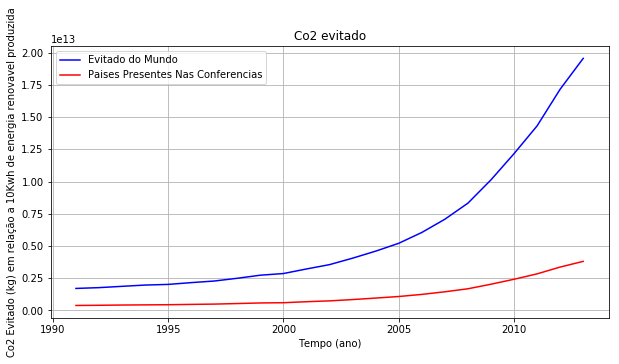

In [191]:
listaTempo = np.arange(1991,2014,1)
plt.plot(listaTempo, Co_2Evitado,color="b",label="Evitado do Mundo")
plt.plot(listaTempo, Co_2Evitado2345678, color="r", label="Paises Presentes Nas Conferencias")
plt.title("Co2 evitado")
plt.xlabel("Tempo (ano)")
plt.ylabel("Co2 Evitado (kg) em relação a 10Kwh de energia renovavel produzida")
plt.legend()
plt.grid(True)
plt.show()

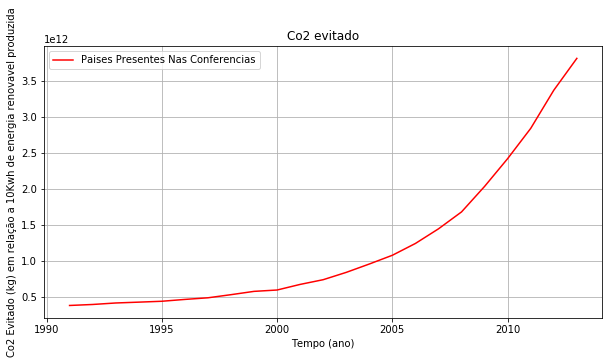

In [192]:
listaTempo = np.arange(1991,2014,1)
plt.plot(listaTempo, Co_2Evitado2345678, color="r", label="Paises Presentes Nas Conferencias")
plt.title("Co2 evitado")
plt.xlabel("Tempo (ano)")
plt.ylabel("Co2 Evitado (kg) em relação a 10Kwh de energia renovavel produzida")
plt.legend()
plt.grid(True)
plt.show()

In [195]:
E_G = greenenergy_idx[greenenergy_idx.columns[35:58]]
for paises not in paises_participantes: 
    Co_2Evitado123 = []
    for i in E_G:
        a = E_G[i].mean()
        evita = (a*305000)/(10**3)
        Co_2Evitado123.append(evita)
    print(Co_2Evitado123)

SyntaxError: invalid syntax (<ipython-input-195-60fc4edd3ffa>, line 2)